In [28]:
import sys  
sys.path.insert(0, '../../data')
sys.path.insert(0, '../../data/description')

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
raw_data = pd.read_csv("../../data/artists_data.csv", delimiter='\t')
raw_data.head()

,id,name,genres,followers,popularity
0,1LEtM3AleYg1xabW6CRkpi,Đen,"indie viet, v-pop, vietnamese hip hop, vietnam...",2899329,59
1,3rjcQ5VIWCN4q7UFetzdeO,JustaTee,"v-pop, vietnamese hip hop, vietnamese melodic rap",618216,55
2,5fa13NJjmn2uQ3dxZDi2Ge,Bich Phuong,v-pop,1182922,46
3,0qkGQFUrj8ERPAZcdpa79j,Phuc Du,v-pop,16509,46
4,71Cy7nzbfpuGJAS5FGxm93,Khoi Vu,vietnamese hip hop,25307,43


### I. Dataset Description:

In [31]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4504 entries, 0 to 4503
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4504 non-null   object
 1   name        4504 non-null   object
 2   genres      3869 non-null   object
 3   followers   4504 non-null   int64 
 4   popularity  4504 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 176.1+ KB


**Column meaning:**

In [32]:
artists_data_des = pd.read_csv('../../data/description/artists_data_des.csv', delimiter='\t')
artists_data_des

,column name,data type,meaning,example
0,id,string,Id of artist,7EnWkKTmRG5i9rW93o5DZm
1,name,string,Name of artist,Axxad
2,genres,string,Artist genres,viral rap
3,followers,int,Number of followers,6826
4,popularity,int,Artist popularity,48


**Columns description:**

In [33]:
def missing_ratio(c):
    return c.isnull().sum() / c.__len__() * 100

def num_diff_vals(c):
    return c.nunique(dropna=True)

def diff_vals(c):
    return c.dropna().unique()

Numeric columns:

In [7]:
numeric_cols_des = raw_data[raw_data.describe().columns].agg([missing_ratio, min, max]).round(1)
numeric_cols_des

,followers,popularity
missing_ratio,0.0,0.0
min,0.0,1.0
max,106484775.0,100.0


In [35]:
data_description = raw_data.describe().astype('int').drop('count')
data_description

,followers,popularity
mean,13474589,63
std,24524685,22
min,0,1
25%,39478,45
50%,667659,64
75%,12445940,86
max,106484775,100


<AxesSubplot:>

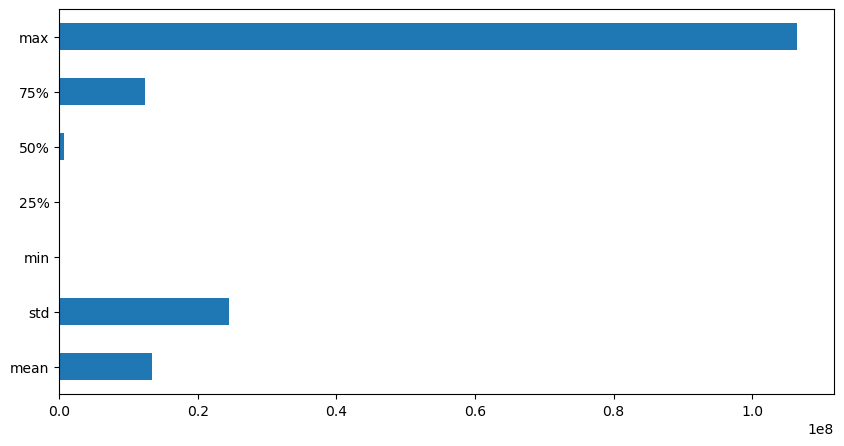

In [36]:
data_description['followers'].plot.barh(figsize=(10, 5))

<AxesSubplot:>

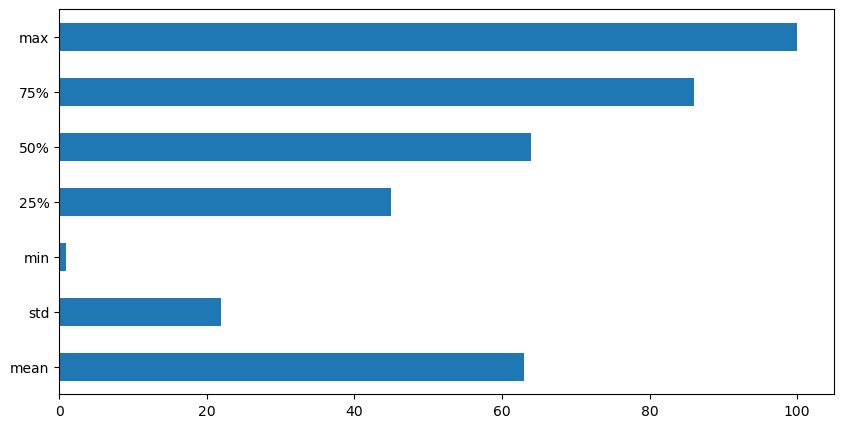

In [26]:
data_description['popularity'].plot.barh(figsize=(10, 5))

Categorical column:

In [37]:
raw_data[['genres']].agg([missing_ratio, num_diff_vals, diff_vals]).round(2)

,genres
missing_ratio,14.098579
num_diff_vals,569
diff_vals,"[indie viet, v-pop, vietnamese hip hop, vietna..."


### II. Check duplicated artists and get the number of unique artists

Number of dupicated artists:

In [38]:
raw_data.duplicated().sum()

2948

In [39]:
raw_data[raw_data.duplicated()]

,id,name,genres,followers,popularity
7,6TITnFVRcl0AcZ4syE7Toe,Low G,vietnamese hip hop,471258,56
27,3Tr8fFMbWxysSzBztIqNPP,WHEE!,"indie viet, v-pop",3827,43
31,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,"dance pop, pop",85939438,91
32,7Cp2hGcriAaDUAWpXnSEwm,buitruonglinh,"indie viet, v-pop",116138,52
34,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,"dance pop, pop",85939438,91
...,...,...,...,...,...
4499,3uZFBSsMiooimnprFL9jD1,Snow,"canadian old school hip hop, reggae fusion",54374,63
4500,4VMYDCV2IEDYJArk749S6m,Daddy Yankee,"latin hip hop, reggaeton, urbano latino",30639677,88
4501,3uZFBSsMiooimnprFL9jD1,Snow,"canadian old school hip hop, reggae fusion",54374,63
4502,2R21vXR83lH98kGeO99Y66,Anuel AA,"reggaeton, reggaeton flow, trap boricua, trap ...",25591124,88


Number of unique artists:

In [40]:
raw_data['id'].nunique()

1556

### III. Data Preprocessing

#### 1. Drop rows with null values in "genres" column

In [41]:
raw_data['genres'].isnull().sum()

635

In [42]:
handled_data = raw_data.dropna(how='any',axis=0) 
handled_data = handled_data.reset_index(drop=True)
handled_data

,id,name,genres,followers,popularity
0,1LEtM3AleYg1xabW6CRkpi,Đen,"indie viet, v-pop, vietnamese hip hop, vietnam...",2899329,59
1,3rjcQ5VIWCN4q7UFetzdeO,JustaTee,"v-pop, vietnamese hip hop, vietnamese melodic rap",618216,55
2,5fa13NJjmn2uQ3dxZDi2Ge,Bich Phuong,v-pop,1182922,46
3,0qkGQFUrj8ERPAZcdpa79j,Phuc Du,v-pop,16509,46
4,71Cy7nzbfpuGJAS5FGxm93,Khoi Vu,vietnamese hip hop,25307,43
...,...,...,...,...,...
3864,3uZFBSsMiooimnprFL9jD1,Snow,"canadian old school hip hop, reggae fusion",54374,63
3865,4VMYDCV2IEDYJArk749S6m,Daddy Yankee,"latin hip hop, reggaeton, urbano latino",30639677,88
3866,3uZFBSsMiooimnprFL9jD1,Snow,"canadian old school hip hop, reggae fusion",54374,63
3867,2R21vXR83lH98kGeO99Y66,Anuel AA,"reggaeton, reggaeton flow, trap boricua, trap ...",25591124,88


#### 2. Drop duplicated rows

In [43]:
unique_data = raw_data.drop_duplicates(subset=['id'], keep='first')
unique_data = unique_data.reset_index(drop=True)
unique_data

,id,name,genres,followers,popularity
0,1LEtM3AleYg1xabW6CRkpi,Đen,"indie viet, v-pop, vietnamese hip hop, vietnam...",2899329,59
1,3rjcQ5VIWCN4q7UFetzdeO,JustaTee,"v-pop, vietnamese hip hop, vietnamese melodic rap",618216,55
2,5fa13NJjmn2uQ3dxZDi2Ge,Bich Phuong,v-pop,1182922,46
3,0qkGQFUrj8ERPAZcdpa79j,Phuc Du,v-pop,16509,46
4,71Cy7nzbfpuGJAS5FGxm93,Khoi Vu,vietnamese hip hop,25307,43
...,...,...,...,...,...
1551,5KnoVkIUGmK0PiDKMjz2LM,Feder,"new french touch, tropical house",194472,56
1552,4VMYDCV2IEDYJArk749S6m,Daddy Yankee,"latin hip hop, reggaeton, urbano latino",30639677,88
1553,3uZFBSsMiooimnprFL9jD1,Snow,"canadian old school hip hop, reggae fusion",54374,63
1554,2WBJQGf1bT1kxuoqziH5g4,Purple Disco Machine,"deep house, house, tropical house",468053,72


### IV. Tracks participation of artists

Counting artists occurences:

In [44]:
occurence_count = raw_data.groupby(raw_data.columns.to_list(), as_index=False).size()
occurence_count

,id,name,genres,followers,popularity,size
0,001OedRF8lGo3og3aHDTy6,Thai Trinh,"v-pop, vietnamese singer-songwriter",5298,28,3
1,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,"art pop, pop",19546837,90,28
2,00OF0nwYaoBSO3AnPVq3vE,Johnny Stimson,"chill r&b, pop",196108,57,3
3,01XYiBYaoMJcNhPokrg0l0,STAYC,"k-pop, k-pop girl group",1103059,68,2
4,01rgao9OzfBm2BOHWJpi1Y,Espinoza Paz,"banda, musica mexicana, ranchera",3153963,65,1
...,...,...,...,...,...,...
1082,7z5WFjZAIYejWy0NI5lv4T,Dan + Shay,"contemporary country, country, country road, pop",2810648,74,2
1083,7zYj9S9SdIunYCfSm7vzAR,JEON SOMI,"k-pop, pop",1736071,62,6
1084,7zkwepHPyac6tCYl0fL0co,ASTN,"bedroom soul, chill r&b, indie r&b, pop",246798,63,1
1085,7zrkFhYAp6dBxsydmJkouN,lullaboy,chill r&b,50481,57,1


The most frequent artist:

In [45]:
occurence_count.loc[occurence_count['size'].idxmax()]

id            1uNFoZAHBGtllmzznpCI3s
name                   Justin Bieber
genres             canadian pop, pop
followers                   68405554
popularity                        91
size                             104
Name: 260, dtype: object

### V. Compute artists correlation

In [46]:
raw_data.corr(method="spearman")

,followers,popularity
followers,1.000000,0.922577
popularity,0.922577,1.000000


### VI. Answering meaningful questions

#### 1. From 2020 to 2022, which are genres having the most related artists ?

<AxesSubplot:>

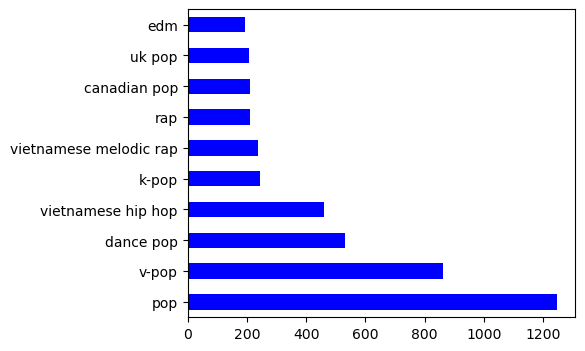

In [47]:
handled_data['genres'].str.split(', ').explode().value_counts().nlargest(10).plot.barh(figsize=(5,4), color='blue')

#### 2. From 2020 to 2022, which are the most frequent artists ?

<AxesSubplot:>

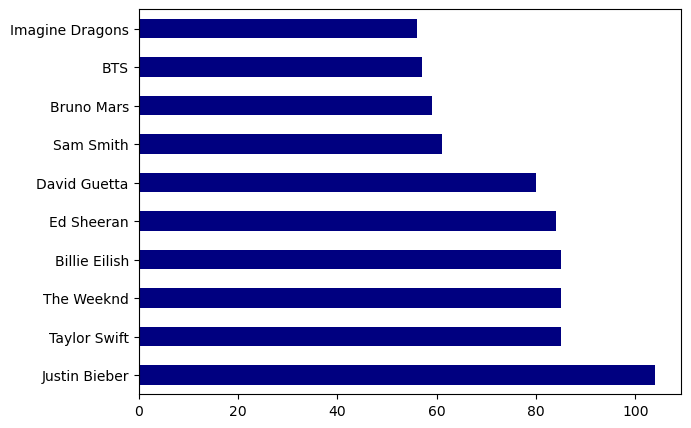

In [52]:
raw_data['name'].value_counts().nlargest(10).plot.barh(figsize=(7,5), color='navy')

#### 3. What is popularity distribution ?

In [49]:
unique_data['popularity'].value_counts().describe().astype(np.int64)

count    86
mean     18
std       8
min       1
25%      13
50%      20
75%      25
max      34
Name: popularity, dtype: int64

<AxesSubplot:>

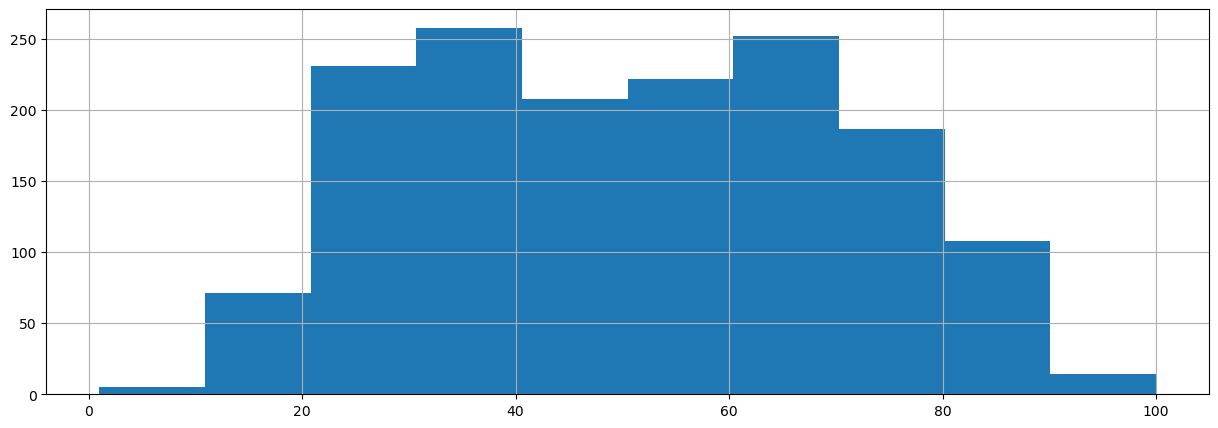

In [50]:
unique_data['popularity'].hist(figsize=(15,5))

#### 4. What is artists followers distribution ?

<AxesSubplot:xlabel='followers', ylabel='popularity'>

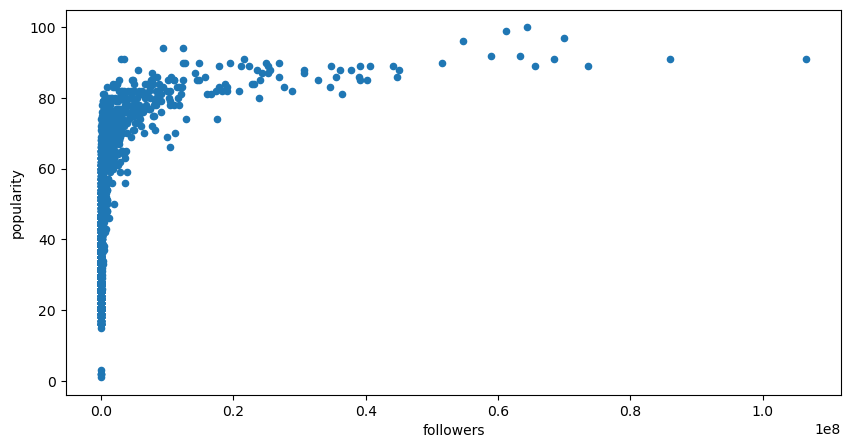

In [51]:
unique_data.plot.scatter(x = 'followers', y = 'popularity', figsize=(10,5))